In [933]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

##  POPULATION TO GDP CHANGE 2010-2019
### North-eastern states compared to California over 2010-2019 period.
#### The goal of this analysis is to compare population and gdp change in north eastern states to California between 2010 and 2019.

https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nst-est2019-popchg2010-2019.pdf

https://www.census.gov/programs-surveys/popest/about/glossary.html

GDP data NJ - https://fred.stlouisfed.org/series/NJNQGSP 
<br>
GDP data NY - https://fred.stlouisfed.org/series/NYNQGSP
<br>
GDP data DE - https://fred.stlouisfed.org/series/DENQGSP
<br>
GDP data MD - https://fred.stlouisfed.org/series/MDNQGSP
<br>
GDP data PE - https://fred.stlouisfed.org/series/PANQGSP
<br>
GDP data CT - https://fred.stlouisfed.org/series/CTNQGSP
<br>
GDP data MA - https://fred.stlouisfed.org/series/MANQGSP
<br>
GDP data VT - https://fred.stlouisfed.org/series/VTNQGSP
<br>
GDP data NH - https://fred.stlouisfed.org/series/NHNQGSP
<br>
GDP data RI - https://fred.stlouisfed.org/series/RINQGSP
<br>
GDP data ME - https://fred.stlouisfed.org/series/MENQGSP
<br>
GDP data CA - https://fred.stlouisfed.org/series/CANQGSP
<br>

### Note:

In the analysis I was mainly using the official state abbrieviations.
<br>
CA - California
<br>
CT - Connecticut
<br>
DE - Delaware
<br>
ME - Maine
<br>
MD - Maryland
<br>
MA - Massachusetts
<br>
NH - New Hampshire
<br>
NJ - New Jersey
<br>
NY - New York
<br>
PE - Pennsylvania
<br>
RI - Rhode Island
<br>
VT - Vermont
<br>
https://www.ssa.gov/international/coc-docs/states.html

In [934]:
data_NJ = pd.read_csv('NJNQGSP.csv')
data_NY = pd.read_csv('NYNQGSP.csv')
data_DE = pd.read_csv('DENQGSP.csv')
data_MD = pd.read_csv('MDNQGSP.csv')
data_PA = pd.read_csv('PANQGSP.csv')
data_CT = pd.read_csv('CTNQGSP.csv')
data_MA = pd.read_csv('MANQGSP.csv')
data_VT = pd.read_csv('VTNQGSP.csv')
data_NH = pd.read_csv('NHNQGSP.csv')
data_RI = pd.read_csv('RINQGSP.csv')
data_ME = pd.read_csv('MENQGSP.csv')
data_CA = pd.read_csv('CANQGSP.csv')
data_population = pd.read_csv('census_population_2010_2019.csv')

In [935]:
data_NJ.head()

,DATE,NJNQGSP
0,2005-01-01,427365.4
1,2005-04-01,432273.2
2,2005-07-01,440082.2
3,2005-10-01,443226.0
4,2006-01-01,448963.6


In [936]:
data_population = data_population.drop(columns=['SUMLEV'])

In [937]:
data_GDP = pd.merge(data_CA, data_CT, how='inner', on='DATE')
data_GDP = data_GDP.merge(data_DE, how='inner', on='DATE').merge(data_ME, how='inner', on='DATE').merge(data_MD, how='inner', on='DATE').merge(data_MA, how='inner', on='DATE').merge(data_NH, how='inner', on='DATE').merge(data_NJ, how='inner', on='DATE').merge(data_NY, how='inner', on='DATE').merge(data_PA, how='inner', on='DATE').merge(data_RI, how='inner', on='DATE').merge(data_VT, how='inner', on='DATE')

In [938]:
data_GDP.head()

,DATE,CANQGSP,CTNQGSP,DENQGSP,MENQGSP,MDNQGSP,MANQGSP,NHNQGSP,NJNQGSP,NYNQGSP,PANQGSP,RINQGSP,VTNQGSP
0,2005-01-01,1657292.4,201987.1,51134.7,46324.2,254961.3,336268.1,56222.1,427365.4,992854.3,500807.4,43230.5,23452.1
1,2005-04-01,1680340.0,204097.8,50162.3,46781.7,259272.5,338958.0,56782.3,432273.2,1007577.9,507458.6,44158.3,23421.2
2,2005-07-01,1715935.1,205354.2,50425.6,47226.2,265714.9,344919.0,57276.7,440082.2,1023170.7,516558.6,44569.6,23647.8
3,2005-10-01,1740674.1,209419.5,56891.4,47982.1,268451.4,347827.6,57529.5,443226.0,1040547.3,522101.0,45538.1,23913.4
4,2006-01-01,1789641.0,217896.9,54409.2,48388.1,270096.8,353125.7,58644.2,448963.6,1065797.0,519399.8,45715.2,24319.8


In [939]:
for col in data_GDP:
    if col != 'DATE':
        data_GDP = data_GDP.rename(columns={col: col[:2] + '_gdp'})

In [940]:
data_GDP.describe()

,CA_gdp,CT_gdp,DE_gdp,ME_gdp,MD_gdp,MA_gdp,NH_gdp,NJ_gdp,NY_gdp,PA_gdp,RI_gdp,VT_gdp
count,6.900000e+01,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,6.900000e+01,69.000000,69.000000,69.000000
mean,2.369209e+06,251776.914493,65309.217391,57854.998551,349842.253623,472812.563768,73362.230435,543527.359420,1.406390e+06,673080.759420,53844.436232,29594.465217
std,5.136006e+05,25984.777609,8885.685849,8538.794764,56294.939809,90390.710235,12133.980791,69975.530199,2.685004e+05,99622.263603,6353.144788,3804.314622
min,1.657292e+06,201987.100000,50162.300000,46324.200000,254961.300000,336268.100000,56222.100000,427365.400000,9.928543e+05,500807.400000,43230.500000,23421.200000
25%,1.920582e+06,234378.300000,57564.000000,50889.900000,297786.200000,391543.000000,62467.800000,489825.500000,1.159540e+06,590889.500000,47955.300000,26136.300000
50%,2.228669e+06,243314.600000,63329.800000,54443.100000,341117.900000,456748.100000,70624.800000,533914.900000,1.371706e+06,670007.200000,53152.800000,29379.900000
75%,2.801947e+06,273515.900000,71757.900000,63526.400000,401716.500000,543479.200000,81529.100000,589622.300000,1.618038e+06,749959.600000,58385.300000,32300.900000
max,3.568888e+06,312212.000000,85220.000000,80454.500000,458827.300000,673788.500000,104435.600000,709180.500000,1.931539e+06,888137.100000,69750.800000,38425.000000


In [941]:
data_GDP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 68
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    69 non-null     object 
 1   CA_gdp  69 non-null     float64
 2   CT_gdp  69 non-null     float64
 3   DE_gdp  69 non-null     float64
 4   ME_gdp  69 non-null     float64
 5   MD_gdp  69 non-null     float64
 6   MA_gdp  69 non-null     float64
 7   NH_gdp  69 non-null     float64
 8   NJ_gdp  69 non-null     float64
 9   NY_gdp  69 non-null     float64
 10  PA_gdp  69 non-null     float64
 11  RI_gdp  69 non-null     float64
 12  VT_gdp  69 non-null     float64
dtypes: float64(12), object(1)
memory usage: 7.5+ KB


Important to note is that the GDP values are provided in millions of dollars. We will focus on yearly differences in this analysis therefore I will leave only January's data for each year.

In [942]:

data_GDP.head()

,DATE,CA_gdp,CT_gdp,DE_gdp,ME_gdp,MD_gdp,MA_gdp,NH_gdp,NJ_gdp,NY_gdp,PA_gdp,RI_gdp,VT_gdp
0,2005-01-01,1657292.4,201987.1,51134.7,46324.2,254961.3,336268.1,56222.1,427365.4,992854.3,500807.4,43230.5,23452.1
1,2005-04-01,1680340.0,204097.8,50162.3,46781.7,259272.5,338958.0,56782.3,432273.2,1007577.9,507458.6,44158.3,23421.2
2,2005-07-01,1715935.1,205354.2,50425.6,47226.2,265714.9,344919.0,57276.7,440082.2,1023170.7,516558.6,44569.6,23647.8
3,2005-10-01,1740674.1,209419.5,56891.4,47982.1,268451.4,347827.6,57529.5,443226.0,1040547.3,522101.0,45538.1,23913.4
4,2006-01-01,1789641.0,217896.9,54409.2,48388.1,270096.8,353125.7,58644.2,448963.6,1065797.0,519399.8,45715.2,24319.8


In [943]:
data_GDP = data_GDP.reset_index()

In [944]:
data_GDP.tail()

,index,DATE,CA_gdp,CT_gdp,DE_gdp,ME_gdp,MD_gdp,MA_gdp,NH_gdp,NJ_gdp,NY_gdp,PA_gdp,RI_gdp,VT_gdp
64,64,2021-01-01,3207138.8,285112.4,77392.3,73174.0,430607.4,610699.8,92752.6,649336.4,1791204.1,807846.2,62340.1,35032.1
65,65,2021-04-01,3321704.1,293594.7,79728.2,75213.9,431318.7,629570.1,98745.6,661895.3,1842362.6,828895.7,65700.5,35702.8
66,66,2021-07-01,3384335.2,298612.2,81546.4,76664.5,439027.7,642037.7,99030.3,677006.3,1867929.4,846123.5,66893.7,36301.6
67,67,2021-10-01,3513347.5,308670.9,84206.0,79176.6,451985.8,663749.8,102438.8,700119.5,1914207.5,874880.8,68822.6,37643.9
68,68,2022-01-01,3568888.3,312212.0,85220.0,80454.5,458827.3,673788.5,104435.6,709180.5,1931538.8,888137.1,69750.8,38425.0


In [945]:
indexes = [i for i in range(0, len(data_GDP))]

In [946]:
indexes_to_keep = []
d = 0
for n in indexes:
    if d + 4 <= len(indexes):
        indexes_to_keep.append(indexes[d])
        d+=4
    

In [947]:
indexes_to_keep.append(68)

In [948]:
indexes_to_keep

[0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68]

In [949]:
data_GDP = data_GDP.iloc[indexes_to_keep]

In [950]:
data_GDP = data_GDP.reset_index()



In [951]:
data_GDP = data_GDP.drop(columns=['level_0', 'index'])

In [952]:
data_GDP.head()

,DATE,CA_gdp,CT_gdp,DE_gdp,ME_gdp,MD_gdp,MA_gdp,NH_gdp,NJ_gdp,NY_gdp,PA_gdp,RI_gdp,VT_gdp
0,2005-01-01,1657292.4,201987.1,51134.7,46324.2,254961.3,336268.1,56222.1,427365.4,992854.3,500807.4,43230.5,23452.1
1,2006-01-01,1789641.0,217896.9,54409.2,48388.1,270096.8,353125.7,58644.2,448963.6,1065797.0,519399.8,45715.2,24319.8
2,2007-01-01,1855811.4,232781.0,56034.8,49651.1,278092.9,370009.1,60797.1,463743.3,1139735.6,550859.5,47853.9,24359.9
3,2008-01-01,1920582.3,247467.5,55475.9,50754.0,291560.4,389409.2,62118.7,495442.6,1125434.2,581997.2,47289.1,25820.0
4,2009-01-01,1910813.6,234566.4,57564.0,50315.2,295671.7,388348.1,61561.6,483644.7,1115297.2,577364.9,46978.9,25890.7


In [953]:
data_population.head()

,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,...,NRANK_PPCHG2010,NRANK_PPCHG2011,NRANK_PPCHG2012,NRANK_PPCHG2013,NRANK_PPCHG2014,NRANK_PPCHG2015,NRANK_PPCHG2016,NRANK_PPCHG2017,NRANK_PPCHG2018,NRANK_PPCHG2019
0,0,0,0,United States,308758105,309321666,311556874,313830990,315993715,318301008,...,X,X,X,X,X,X,X,X,X,X
1,1,0,0,Northeast Region,55318443,55380134,55604223,55775216,55901806,56006011,...,3,3,3,4,4,4,4,4,4,4
2,2,0,0,Midwest Region,66929725,66974416,67157800,67336743,67560379,67745167,...,4,4,4,3,3,3,3,3,3,3
3,3,0,0,South Region,114563030,114866680,116006522,117241208,118364400,119624037,...,1,1,1,1,1,1,1,1,1,1
4,4,0,0,West Region,71946907,72100436,72788329,73477823,74167130,74925793,...,2,2,2,2,2,2,2,2,2,2


In [954]:
data_population.head()

,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,...,NRANK_PPCHG2010,NRANK_PPCHG2011,NRANK_PPCHG2012,NRANK_PPCHG2013,NRANK_PPCHG2014,NRANK_PPCHG2015,NRANK_PPCHG2016,NRANK_PPCHG2017,NRANK_PPCHG2018,NRANK_PPCHG2019
0,0,0,0,United States,308758105,309321666,311556874,313830990,315993715,318301008,...,X,X,X,X,X,X,X,X,X,X
1,1,0,0,Northeast Region,55318443,55380134,55604223,55775216,55901806,56006011,...,3,3,3,4,4,4,4,4,4,4
2,2,0,0,Midwest Region,66929725,66974416,67157800,67336743,67560379,67745167,...,4,4,4,3,3,3,3,3,3,3
3,3,0,0,South Region,114563030,114866680,116006522,117241208,118364400,119624037,...,1,1,1,1,1,1,1,1,1,1
4,4,0,0,West Region,71946907,72100436,72788329,73477823,74167130,74925793,...,2,2,2,2,2,2,2,2,2,2


In [955]:
data_population = data_population.drop([col for col in data_population.columns if 'PP' in col], axis=1)
data_population = data_population.drop([col for col in data_population.columns if 'NP' in col], axis=1)
data_population = data_population.drop([col for col in data_population.columns if 'NRANK' in col], axis=1)

In [956]:
data_population.head()

,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,0,0,United States,308758105,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523
1,1,0,0,Northeast Region,55318443,55380134,55604223,55775216,55901806,56006011,56034684,56042330,56059240,56046620,55982803
2,2,0,0,Midwest Region,66929725,66974416,67157800,67336743,67560379,67745167,67860583,67987540,68126781,68236628,68329004
3,3,0,0,South Region,114563030,114866680,116006522,117241208,118364400,119624037,120997341,122351760,123542189,124569433,125580448
4,4,0,0,West Region,71946907,72100436,72788329,73477823,74167130,74925793,75742555,76559681,77257329,77834820,78347268


In [957]:
data_population_cleaned = data_population.iloc[[0,9,11,12,24,25,26,34,35,37,43,44,50]]


In [958]:
data_population_cleaned.reset_index()

,index,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,0,0,0,United States,308758105,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523
1,9,4,9,6,California,37254519,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223
2,11,1,1,9,Connecticut,3574147,3579114,3588283,3594547,3594841,3594524,3587122,3578141,3573297,3571520,3565287
3,12,3,5,10,Delaware,897937,899593,907381,915179,923576,932487,941252,948921,956823,965479,973764
4,24,1,1,23,Maine,1328358,1327629,1328284,1327729,1328009,1330513,1328262,1331317,1334612,1339057,1344212
5,25,3,5,24,Maryland,5773794,5788645,5839419,5886992,5923188,5957283,5985562,6003323,6023868,6035802,6045680
6,26,1,1,25,Massachusetts,6547785,6566307,6613583,6663005,6713315,6762596,6794228,6823608,6859789,6882635,6892503
7,34,1,1,33,New Hampshire,1316462,1316762,1320202,1324232,1326622,1333341,1336350,1342307,1348787,1353465,1359711
8,35,1,2,34,New Jersey,8791978,8799446,8828117,8844942,8856972,8864525,8867949,8870827,8885525,8886025,8882190
9,37,1,2,36,New York,19378144,19399878,19499241,19572932,19624447,19651049,19654666,19633428,19589572,19530351,19453561


In [959]:
data_population_cleaned = data_population_cleaned.drop(columns=['REGION','DIVISION','STATE','ESTIMATESBASE2010'],axis=1)

In [960]:
data_population_cleaned = data_population_cleaned.reset_index()



In [961]:
data_GDP.head()

,DATE,CA_gdp,CT_gdp,DE_gdp,ME_gdp,MD_gdp,MA_gdp,NH_gdp,NJ_gdp,NY_gdp,PA_gdp,RI_gdp,VT_gdp
0,2005-01-01,1657292.4,201987.1,51134.7,46324.2,254961.3,336268.1,56222.1,427365.4,992854.3,500807.4,43230.5,23452.1
1,2006-01-01,1789641.0,217896.9,54409.2,48388.1,270096.8,353125.7,58644.2,448963.6,1065797.0,519399.8,45715.2,24319.8
2,2007-01-01,1855811.4,232781.0,56034.8,49651.1,278092.9,370009.1,60797.1,463743.3,1139735.6,550859.5,47853.9,24359.9
3,2008-01-01,1920582.3,247467.5,55475.9,50754.0,291560.4,389409.2,62118.7,495442.6,1125434.2,581997.2,47289.1,25820.0
4,2009-01-01,1910813.6,234566.4,57564.0,50315.2,295671.7,388348.1,61561.6,483644.7,1115297.2,577364.9,46978.9,25890.7


In [962]:
for col in data_population_cleaned:
    if col != 'NAME':
        data_population_cleaned = data_population_cleaned.rename(columns={col: col[-4:]})

In [963]:
data_population_cleaned = data_population_cleaned.rename(columns={'ndex': 'index'})

In [964]:
data_population_cleaned.head()


,index,NAME,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,United States,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523
1,9,California,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223
2,11,Connecticut,3579114,3588283,3594547,3594841,3594524,3587122,3578141,3573297,3571520,3565287
3,12,Delaware,899593,907381,915179,923576,932487,941252,948921,956823,965479,973764
4,24,Maine,1327629,1328284,1327729,1328009,1330513,1328262,1331317,1334612,1339057,1344212


In [965]:
data_population_cleaned = data_population_cleaned.reset_index()

data_population_cleaned = data_population_cleaned.drop(columns=['level_0','index'],axis=1)

data_population_cleaned = data_population_cleaned.set_index('NAME')

data_population_cleaned = data_population_cleaned.T
    


data_population_cleaned.head()

NAME,United States,California,Connecticut,Delaware,Maine,Maryland,Massachusetts,New Hampshire,New Jersey,New York,Pennsylvania,Rhode Island,Vermont
2010,309321666,37319502,3579114,899593,1327629,5788645,6566307,1316762,8799446,19399878,12711160,1053959,625879
2011,311556874,37638369,3588283,907381,1328284,5839419,6613583,1320202,8828117,19499241,12745815,1053649,627049
2012,313830990,37948800,3594547,915179,1327729,5886992,6663005,1324232,8844942,19572932,12767118,1054621,626090
2013,315993715,38260787,3594841,923576,1328009,5923188,6713315,1326622,8856972,19624447,12776309,1055081,626210
2014,318301008,38596972,3594524,932487,1330513,5957283,6762596,1333341,8864525,19651049,12788313,1055936,625214


In [966]:
data_population_cleaned = data_population_cleaned.rename(columns={'California': 'CA_pop', 'Connecticut': 'CT_pop', 'Delaware': 'DE_pop', 'Maine': 'ME_pop','Maryland':'MD_pop','Massachusetts': 'MA_pop','New Hampshire': 'NH_pop', 'New Jersey': 'NJ_pop', 'New York': 'NY_pop', 'Pennsylvania': 'PA_pop', 'Rhode Island': 'RI_pop', 'Vermont':'VT_pop','United States':'US_pop'})

In [967]:
data_population_cleaned['DATE'] = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

In [968]:
data_population_cleaned.reset_index()
data_population_cleaned.head()

NAME,US_pop,CA_pop,CT_pop,DE_pop,ME_pop,MD_pop,MA_pop,NH_pop,NJ_pop,NY_pop,PA_pop,RI_pop,VT_pop,DATE
2010,309321666,37319502,3579114,899593,1327629,5788645,6566307,1316762,8799446,19399878,12711160,1053959,625879,2010
2011,311556874,37638369,3588283,907381,1328284,5839419,6613583,1320202,8828117,19499241,12745815,1053649,627049,2011
2012,313830990,37948800,3594547,915179,1327729,5886992,6663005,1324232,8844942,19572932,12767118,1054621,626090,2012
2013,315993715,38260787,3594841,923576,1328009,5923188,6713315,1326622,8856972,19624447,12776309,1055081,626210,2013
2014,318301008,38596972,3594524,932487,1330513,5957283,6762596,1333341,8864525,19651049,12788313,1055936,625214,2014


In [969]:
data_GDP.head()

,DATE,CA_gdp,CT_gdp,DE_gdp,ME_gdp,MD_gdp,MA_gdp,NH_gdp,NJ_gdp,NY_gdp,PA_gdp,RI_gdp,VT_gdp
0,2005-01-01,1657292.4,201987.1,51134.7,46324.2,254961.3,336268.1,56222.1,427365.4,992854.3,500807.4,43230.5,23452.1
1,2006-01-01,1789641.0,217896.9,54409.2,48388.1,270096.8,353125.7,58644.2,448963.6,1065797.0,519399.8,45715.2,24319.8
2,2007-01-01,1855811.4,232781.0,56034.8,49651.1,278092.9,370009.1,60797.1,463743.3,1139735.6,550859.5,47853.9,24359.9
3,2008-01-01,1920582.3,247467.5,55475.9,50754.0,291560.4,389409.2,62118.7,495442.6,1125434.2,581997.2,47289.1,25820.0
4,2009-01-01,1910813.6,234566.4,57564.0,50315.2,295671.7,388348.1,61561.6,483644.7,1115297.2,577364.9,46978.9,25890.7


In [970]:
year = 2005
for i in range(0,len(data_GDP)):
    data_GDP.loc[i ,['DATE']] = [int(year)]
    year += 1
    

In [971]:
data_GDP.head()

,DATE,CA_gdp,CT_gdp,DE_gdp,ME_gdp,MD_gdp,MA_gdp,NH_gdp,NJ_gdp,NY_gdp,PA_gdp,RI_gdp,VT_gdp
0,2005,1657292.4,201987.1,51134.7,46324.2,254961.3,336268.1,56222.1,427365.4,992854.3,500807.4,43230.5,23452.1
1,2006,1789641.0,217896.9,54409.2,48388.1,270096.8,353125.7,58644.2,448963.6,1065797.0,519399.8,45715.2,24319.8
2,2007,1855811.4,232781.0,56034.8,49651.1,278092.9,370009.1,60797.1,463743.3,1139735.6,550859.5,47853.9,24359.9
3,2008,1920582.3,247467.5,55475.9,50754.0,291560.4,389409.2,62118.7,495442.6,1125434.2,581997.2,47289.1,25820.0
4,2009,1910813.6,234566.4,57564.0,50315.2,295671.7,388348.1,61561.6,483644.7,1115297.2,577364.9,46978.9,25890.7


The cleaning process is done. I deleted the unnecessary columns and rows in both datasets, normalized the naming and data types across datasets. Tables are ready for analysis. I have decided to stick to state abbreviations, because the full names take too much space.

In [972]:
GDP_2010_2019 = data_GDP[(data_GDP.DATE >= 2010) & (data_GDP.DATE <= 2019)]

In [973]:
def calculate_2010_2019_diff(dataset, column):
    difference = dataset[column].iat[-1] - dataset[column].iat[0]
    return difference




Function above calculates the difference between the 2019 and 2010 values. Note that the dataset needs to be prepared earlier as the function uses simple indexes.

In [974]:
def calculate_all_values(dataset):
    dict_diff = {}
    for i in dataset:
        if i != 'DATE':
            dict_diff[i] = calculate_2010_2019_diff(dataset, i)
    return dict_diff
        
        

In [975]:
dictionary_diff_GDP = calculate_all_values(GDP_2010_2019)

In [976]:
def calculate_increase_ratio(dictionary_values, dataset):
    dict_ratio = {}
    for k,v in  dictionary_values.items():
        ratio = dictionary_values[k] / dataset[k].iat[0]
        dict_ratio[k] = ratio
    return dict_ratio

In [977]:
ratio_change_gdp = calculate_increase_ratio(dictionary_diff_GDP, GDP_2010_2019)

ratio_change_gdp

{'CA_gdp': 0.5537822767185546,
 'CT_gdp': 0.2252932122240298,
 'DE_gdp': 0.2933406062976324,
 'ME_gdp': 0.29898616977065584,
 'MD_gdp': 0.349847628781764,
 'MA_gdp': 0.4544345146255944,
 'NH_gdp': 0.3675030343780432,
 'NJ_gdp': 0.2822117264209397,
 'NY_gdp': 0.43784440753881254,
 'PA_gdp': 0.33132066147731515,
 'RI_gdp': 0.24712376262085553,
 'VT_gdp': 0.26550749772003535}

Provided functions helped us determine which of the states included in the analysis had the highest GDP increase between 2010 and 2019. The fastes growing state was California with around 55% GDP growth, second was Massachusetts with 45% and on the third place was New York with 43% growth. The slowest growing state was Connecticut with 22% growth.

In [978]:
def calc_avg_growth(data):
    ttl_sum = 0
    for i in data.values():
        ttl_sum += i
    return ttl_sum / len(data)

In [979]:
avg_growth_gdp = calc_avg_growth(ratio_change_gdp)
avg_growth_gdp

0.3422662915478527

On average, analyzed states grew around 34% between 2010 and 2019.

In [980]:
dict_diff_pop = calculate_all_values(data_population_cleaned)

In [981]:
ratio_change_pop = calculate_increase_ratio(dict_diff_pop, data_population_cleaned)

In [982]:
ratio_change_pop

{'US_pop': 0.06115917208334187,
 'CA_pop': 0.0587553660281962,
 'CT_pop': -0.0038632466023714247,
 'DE_pop': 0.08244950772182531,
 'ME_pop': 0.012490688287164561,
 'MD_pop': 0.04440331027382056,
 'MA_pop': 0.04967723866703156,
 'NH_pop': 0.0326171320253774,
 'NJ_pop': 0.009403319254416698,
 'NY_pop': 0.002767182350321997,
 'PA_pop': 0.0071456106287703085,
 'RI_pop': 0.005125436568215651,
 'VT_pop': -0.0030197530193535813}

In [983]:
pop_change_ratio = [i for i in ratio_change_pop.values()]
x_values_list = [i[:2] for i in ratio_change_pop.keys()]

Using the functions above we calculated that states with the highest % growth in population between 2010 and 2019 are: 
1. Delaware - 8.2%
2. California - 5.8%
3. Massachusetts - 4.9%

The states with decreasing population/ lowest growth are:
1. Connecticut population decrease 0.38%
2. Vermont population decrease 0.30%
3. New York population incease 0.2%

Between 2010 and 2019 total % population growth in US was approximately 6.1%.



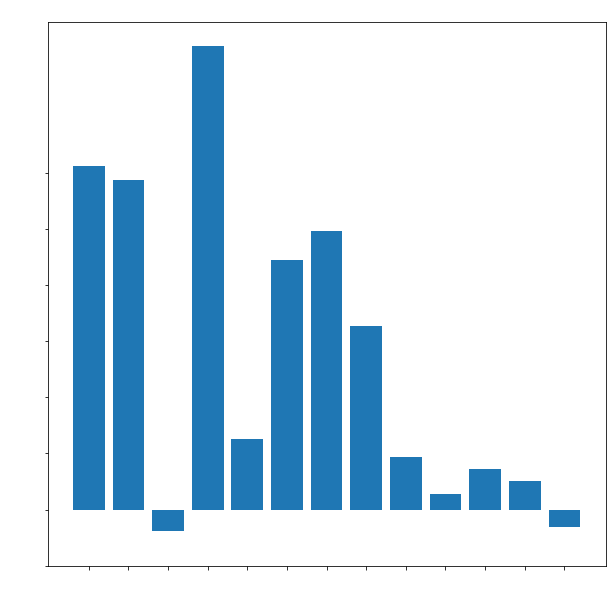

In [984]:
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
ax.bar(x_values_list,pop_change_ratio)
ax.set_yticks([-0.01,0,0.01,0.02,0.03,0.04,0.05,0.06])
ax.set_yticklabels(['-1%','0%','1%','2%','3%','4%','5%','6%'],color='white')
ax.set_xticks(range(len(x_values_list)))
ax.set_xticklabels(x_values_list,color='white')
plt.title('Population change in % in 2010-2019 period for each state',color='white')
ax.set_xlabel('States',color='white')
ax.set_ylabel('Population change in %',color='white')
plt.show()

In [985]:
new_list_ratio = ratio_change_pop
del new_list_ratio['US_pop']
avg_pop_chng = calc_avg_growth(new_list_ratio)
avg_pop_chng

0.024829316015284594

In [986]:
without_DE_ratio = new_list_ratio
del without_DE_ratio['DE_pop']

In [987]:
avg_pop_chng_without_DE = calc_avg_growth(without_DE_ratio)

In [988]:
avg_pop_chng_without_DE

0.01959111676923545

The average population growth for analyzed states was 2.5%. It is 3.6% lower than avg growth for the all US.

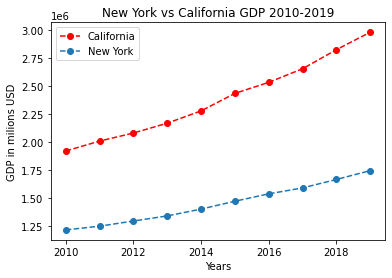

In [989]:
plt.plot(GDP_2010_2019.DATE,GDP_2010_2019.CA_gdp,color='red',linestyle='--', marker='o',label='California')
plt.plot(GDP_2010_2019.DATE,GDP_2010_2019.NY_gdp,linestyle='--', marker='o',label='New York')
plt.title('New York vs California GDP 2010-2019')
plt.xlabel('Years')
plt.ylabel('GDP in milions USD')
plt.legend()
plt.show()

On the plot we can clearly see the difference in GDP between NY and CA for 2010-2019 period. Ploting remaining states total GDP would be pointless as they are way smaller than both biggest economies. Let's first calculate GDP per capita and then check if it makes any difference.


In [990]:
data_gdp_pop = GDP_2010_2019.merge(data_population_cleaned,how='inner',on='DATE')

data_gdp_pop

,DATE,CA_gdp,CT_gdp,DE_gdp,ME_gdp,MD_gdp,MA_gdp,NH_gdp,NJ_gdp,NY_gdp,...,DE_pop,ME_pop,MD_pop,MA_pop,NH_pop,NJ_pop,NY_pop,PA_pop,RI_pop,VT_pop
0,2010,1919069.0,232715.4,58298.1,51734.5,307997.8,400544.4,63357.3,489825.5,1212281.1,...,899593,1327629,5788645,6566307,1316762,8799446,19399878,12711160,1053959,625879
1,2011,2007608.8,229837.2,60135.2,52169.8,321133.2,414300.3,64732.3,487799.7,1245779.2,...,907381,1328284,5839419,6613583,1320202,8828117,19499241,12745815,1053649,627049
2,2012,2079759.5,238772.4,63329.8,53453.5,332291.9,436320.5,67319.4,513255.1,1292014.6,...,915179,1327729,5886992,6663005,1324232,8844942,19572932,12767118,1054621,626090
3,2013,2167627.5,240516.6,60525.2,54322.1,338189.8,448675.7,70006.4,533914.9,1337603.4,...,923576,1328009,5923188,6713315,1326622,8856972,19624447,12776309,1055081,626210
4,2014,2277808.7,240087.1,65239.4,55211.7,345118.3,457454.6,70883.2,535654.2,1398650.6,...,932487,1330513,5957283,6762596,1333341,8864525,19651049,12788313,1055936,625214
5,2015,2434212.2,257473.1,71813.8,57043.3,364691.1,490415.3,74430.9,557467.4,1469160.0,...,941252,1328262,5985562,6794228,1336350,8867949,19654666,12784826,1056065,625216
6,2016,2533323.0,262267.0,69118.4,59239.9,380862.8,505926.1,78025.9,572780.6,1535235.7,...,948921,1331317,6003323,6823608,1342307,8870827,19633428,12782275,1056770,623657
7,2017,2654787.0,266213.8,69230.2,61642.6,395237.0,521661.3,79674.5,578231.6,1588241.9,...,956823,1334612,6023868,6859789,1348787,8885525,19589572,12787641,1055673,624344
8,2018,2825572.2,277508.2,70437.8,64503.8,405957.4,552395.3,82981.9,602328.1,1663723.9,...,965479,1339057,6035802,6882635,1353465,8886025,19530351,12800922,1058287,624358
9,2019,2981815.4,285144.6,75399.3,67202.4,415750.1,582565.6,86641.3,628060.0,1743071.6,...,973764,1344212,6045680,6892503,1359711,8882190,19453561,12801989,1059361,623989


I decided to merge the dataframes to make future calculations easier.

In [991]:

def calc_gdp_per_capita(data):
    for i in data:
        if i != 'DATE' and i != 'US_pop' and i[-3:] == 'gdp':
            pop = i[:2] + '_pop'
            d = i[:2] + '_gdp_per_capita'
            data[d] = (data[i] *1000000) / data[pop]
            
            

In [992]:
calc_gdp_per_capita(data_gdp_pop)

data_gdp_pop

,DATE,CA_gdp,CT_gdp,DE_gdp,ME_gdp,MD_gdp,MA_gdp,NH_gdp,NJ_gdp,NY_gdp,...,DE_gdp_per_capita,ME_gdp_per_capita,MD_gdp_per_capita,MA_gdp_per_capita,NH_gdp_per_capita,NJ_gdp_per_capita,NY_gdp_per_capita,PA_gdp_per_capita,RI_gdp_per_capita,VT_gdp_per_capita
0,2010,1919069.0,232715.4,58298.1,51734.5,307997.8,400544.4,63357.3,489825.5,1212281.1,...,64804.972916,38967.588084,53207.235890,60999.950200,48115.984514,55665.493032,62489.109468,46485.883271,46083.766067,42747.559832
1,2011,2007608.8,229837.2,60135.2,52169.8,321133.2,414300.3,64732.3,487799.7,1245779.2,...,66273.373588,39276.088547,54994.032797,62643.849786,49032.117812,55255.237329,63888.599561,47899.659614,46542.159676,44315.994444
2,2012,2079759.5,238772.4,63329.8,53453.5,332291.9,436320.5,67319.4,513255.1,1292014.6,...,69199.358814,40259.345092,56445.108130,65484.042110,50836.560361,58028.091083,66010.273780,50252.868345,48621.827178,46404.989698
3,2013,2167627.5,240516.6,60525.2,54322.1,338189.8,448675.7,70006.4,533914.9,1337603.4,...,65533.534869,40904.918566,57095.908487,66833.702873,52770.419909,60281.877373,68160.055669,51691.407902,50057.483738,46839.877996
4,2014,2277808.7,240087.1,65239.4,55211.7,345118.3,457454.6,70883.2,535654.2,1398650.6,...,69962.798409,41496.550579,57932.164713,67644.821604,53162.094318,60426.723372,71174.347995,53056.708887,50982.256500,46831.165009
5,2015,2434212.2,257473.1,71813.8,57043.3,364691.1,490415.3,74430.9,557467.4,1469160.0,...,76296.039743,42945.819424,60928.464194,72181.166131,55697.160175,62863.171631,74748.662735,55513.348402,52837.940846,49034.413707
6,2016,2533323.0,262267.0,69118.4,59239.9,380862.8,505926.1,78025.9,572780.6,1535235.7,...,72838.940228,44497.215915,63441.997041,74143.488313,58128.207631,64569.019326,78194.989688,56167.278517,53335.446691,50325.900295
7,2017,2654787.0,266213.8,69230.2,61642.6,395237.0,521661.3,79674.5,578231.6,1588241.9,...,72354.238976,46187.656038,65611.829476,76046.260315,59071.224737,65075.682078,81075.885680,57461.153312,54150.385583,51411.241239
8,2018,2825572.2,277508.2,70437.8,64503.8,405957.4,552395.3,82981.9,602328.1,1663723.9,...,72956.325306,48171.063666,67258.236768,80259.275699,61310.709919,67783.750327,85186.584716,59418.063793,55169.627899,52498.086034
9,2019,2981815.4,285144.6,75399.3,67202.4,415750.1,582565.6,86641.3,628060.0,1743071.6,...,77430.773781,49993.899772,68768.128647,84521.631692,63720.378816,70710.038853,89601.672414,61448.529600,57179.091924,54261.212938


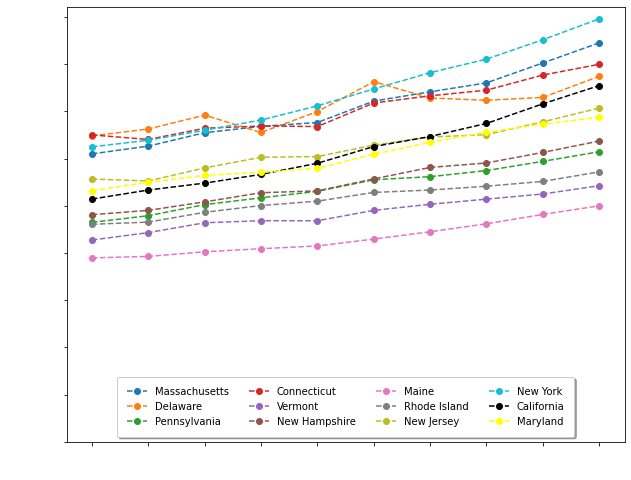

In [993]:
plt.figure(figsize=(10,8))
ax=plt.subplot(1,1,1)
ranges = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000]
rang_dol = [str(i) + '$' for i in ranges]
ax.plot(data_gdp_pop.DATE,data_gdp_pop.MA_gdp_per_capita,label='Massachusetts',linestyle='--',marker='o')
ax.plot(data_gdp_pop.DATE,data_gdp_pop.DE_gdp_per_capita,label='Delaware',linestyle='--',marker='o')
ax.plot(data_gdp_pop.DATE,data_gdp_pop.PA_gdp_per_capita,label='Pennsylvania',linestyle='--',marker='o')
ax.plot(data_gdp_pop.DATE,data_gdp_pop.CT_gdp_per_capita,label='Connecticut',linestyle='--',marker='o')
ax.plot(data_gdp_pop.DATE,data_gdp_pop.VT_gdp_per_capita,label='Vermont',linestyle='--',marker='o')
ax.plot(data_gdp_pop.DATE,data_gdp_pop.NH_gdp_per_capita,label='New Hampshire',linestyle='--',marker='o')
ax.plot(data_gdp_pop.DATE,data_gdp_pop.ME_gdp_per_capita,label='Maine',linestyle='--',marker='o')
ax.plot(data_gdp_pop.DATE,data_gdp_pop.RI_gdp_per_capita,label='Rhode Island',linestyle='--',marker='o')
ax.plot(data_gdp_pop.DATE,data_gdp_pop.NJ_gdp_per_capita,label='New Jersey',linestyle='--',marker='o')
ax.plot(data_gdp_pop.DATE,data_gdp_pop.NY_gdp_per_capita,label='New York',linestyle='--',marker='o')
ax.plot(data_gdp_pop.DATE,data_gdp_pop.CA_gdp_per_capita,label='California',linestyle='--',marker='o',color='black')
ax.plot(data_gdp_pop.DATE,data_gdp_pop.MD_gdp_per_capita,label='Maryland',linestyle='--',marker='o',color='yellow')
ax.set_xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
ax.set_xticklabels([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019],color='white')
ax.set_yticks(ranges)
ax.set_yticklabels(rang_dol,color='white')
ax.set_xlabel('Years',color='white')
ax.set_ylabel('Gdp per capita in USD', color='white')
ax.legend(loc=8,ncol=4,fancybox=True,shadow=True,borderpad=1)
plt.show()

On the above plot we can see that the gdp per capita comparision for given states makes much more sense. New York, Massachusetts and Connecticut turn out to be the best in terms of gdp per capita. Maine turned out to be the worst with around 50% lower gross domestic product per capita than New York.

In [994]:
data_2010_2019 = data_gdp_pop[(data_gdp_pop.DATE == 2010) | (data_gdp_pop.DATE == 2019)]

data_2010_2019

,DATE,CA_gdp,CT_gdp,DE_gdp,ME_gdp,MD_gdp,MA_gdp,NH_gdp,NJ_gdp,NY_gdp,...,DE_gdp_per_capita,ME_gdp_per_capita,MD_gdp_per_capita,MA_gdp_per_capita,NH_gdp_per_capita,NJ_gdp_per_capita,NY_gdp_per_capita,PA_gdp_per_capita,RI_gdp_per_capita,VT_gdp_per_capita
0,2010,1919069.0,232715.4,58298.1,51734.5,307997.8,400544.4,63357.3,489825.5,1212281.1,...,64804.972916,38967.588084,53207.235890,60999.950200,48115.984514,55665.493032,62489.109468,46485.883271,46083.766067,42747.559832
9,2019,2981815.4,285144.6,75399.3,67202.4,415750.1,582565.6,86641.3,628060.0,1743071.6,...,77430.773781,49993.899772,68768.128647,84521.631692,63720.378816,70710.038853,89601.672414,61448.529600,57179.091924,54261.212938


In [995]:
gdp_per_capita = data_2010_2019.drop([col for col in data_2010_2019.columns if not 'capita' in col],axis=1)

gdp_per_capita

,CA_gdp_per_capita,CT_gdp_per_capita,DE_gdp_per_capita,ME_gdp_per_capita,MD_gdp_per_capita,MA_gdp_per_capita,NH_gdp_per_capita,NJ_gdp_per_capita,NY_gdp_per_capita,PA_gdp_per_capita,RI_gdp_per_capita,VT_gdp_per_capita
0,51422.685115,65020.393315,64804.972916,38967.588084,53207.235890,60999.950200,48115.984514,55665.493032,62489.109468,46485.883271,46083.766067,42747.559832
9,75465.645150,79978.021405,77430.773781,49993.899772,68768.128647,84521.631692,63720.378816,70710.038853,89601.672414,61448.529600,57179.091924,54261.212938


In [996]:
state_names = [i[:2] for i in gdp_per_capita.columns]
gdp_2010 = gdp_per_capita.iloc[0]
gdp_2019 = gdp_per_capita.iloc[1]

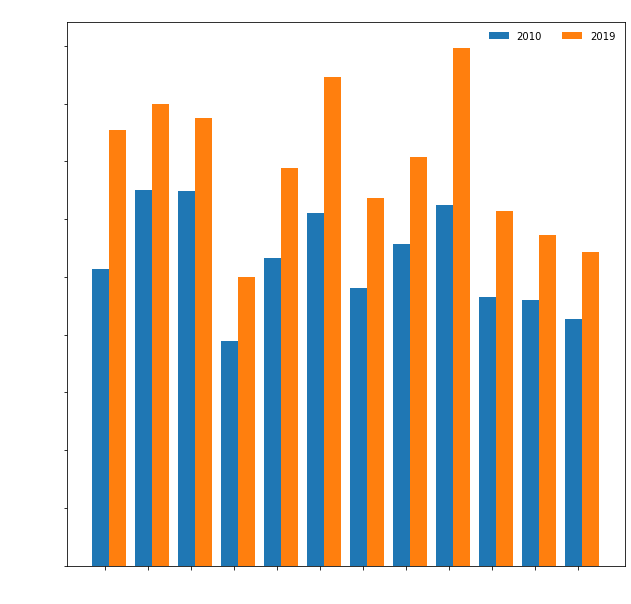

In [997]:
plt.figure(figsize=(10,10))
store_2010 = [2*element + 0.8*1 for element in range(len(state_names))]
store_2019 = [2*element + 0.8*2 for element in range(len(state_names))]
ax=plt.subplot(1,1,1)
ax.bar(store_2010, gdp_2010.to_list())
ax.bar(store_2019, gdp_2019.to_list())
ax.set_xticks(np.arange(1,25,2))
ax.set_xticklabels(state_names,color='white')
plt.title('Gdp per capita 2010 vs 2019 for each state',color='white')
ax.set_yticks(ranges)
ax.set_yticklabels(rang_dol, color='white')
ax.set_ylabel('Gdp per capita in USD',color='white')
ax.set_xlabel('State',color='white')


years = [2010,2019]
plt.legend(years,frameon=False,ncol=2)


plt.show()

On the chart above we can see the big disproportion of gdp per capita growth over the years. New York had clearly the highest gdp per capita growth among the analyzed states.

In [998]:
gdp_per_capita = gdp_per_capita.reset_index()

gdp_per_capita

,index,CA_gdp_per_capita,CT_gdp_per_capita,DE_gdp_per_capita,ME_gdp_per_capita,MD_gdp_per_capita,MA_gdp_per_capita,NH_gdp_per_capita,NJ_gdp_per_capita,NY_gdp_per_capita,PA_gdp_per_capita,RI_gdp_per_capita,VT_gdp_per_capita
0,0,51422.685115,65020.393315,64804.972916,38967.588084,53207.235890,60999.950200,48115.984514,55665.493032,62489.109468,46485.883271,46083.766067,42747.559832
1,9,75465.645150,79978.021405,77430.773781,49993.899772,68768.128647,84521.631692,63720.378816,70710.038853,89601.672414,61448.529600,57179.091924,54261.212938


In [999]:

def calculate_ratio(dataset):
    dict_gdp = {}
    for i in dataset.columns:
        if i != 'index':
            d = i[:2]
            diff = dataset[i].iloc[-1] - dataset[i].iloc[0] 
            dict_gdp[d] =  diff / dataset[i].iloc[0] 
    return dict_gdp

            
    

In [1000]:
ratio_dict_gdp = calculate_ratio(gdp_per_capita)
ratio_dict_gdp

{'CA': 0.4675555152531574,
 'CT': 0.2300451800867634,
 'DE': 0.19482765438145794,
 'ME': 0.2829611025540957,
 'MD': 0.2924582060428957,
 'MA': 0.3856016507250913,
 'NH': 0.32430790848474494,
 'NJ': 0.2702670002789663,
 'NY': 0.4338766094924855,
 'PA': 0.32187505701996705,
 'RI': 0.24076430388518577,
 'VT': 0.2693405928077544}

In [1001]:
ratios_list = [i for i in ratio_dict_gdp.values()]

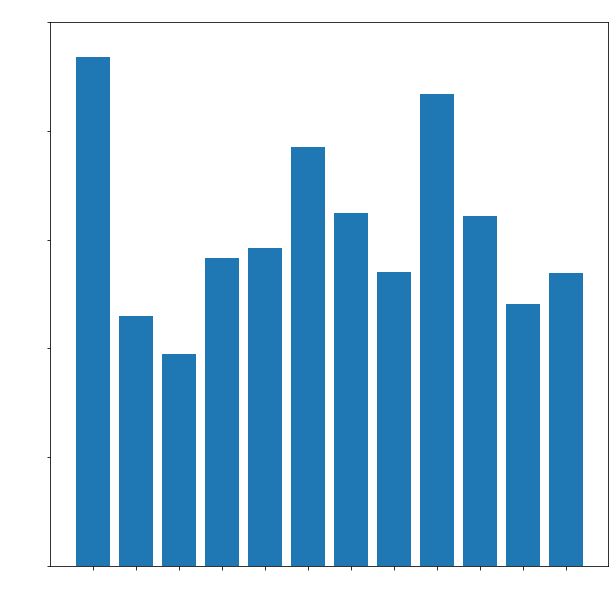

In [1002]:
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
ax.bar(state_names,ratios_list)
plt.title('Gdp per capita growth 2010-2019 for each state',color='white')
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5])
ax.set_yticklabels(['0%','10%','20%','30%','40%','50%'],color='white')
ax.set_xticks(range(len(state_names)))
ax.set_xticklabels(state_names,color='white')
ax.set_xlabel('States',color='white')
ax.set_ylabel('Gdp per capita growth 2010-2019 in %',color='white')
plt.show()

As we can see oh the graph California and New York had by far the biggest gdp per capita growth over the 2010-2019 period. Delaware had the slowest growth, but we have to remember that, by far the highest population growth in analazyed states occured in Delaware which also impacted the gdp per capita in this state. Delaware had population growth equal to 8.2% compared to average 2.5% in analyzed states. 

I have decided to check how the gdp per capita in Delaware would look like if the population growth was equal to the observed average in analyzed states. I have decided to compare it to the average among the remaining 11 states analyzed without counting Delaware population growth. The population growth in those states was equal to 1.9% for 2010-2019 period.

In [1003]:
population_2010_DE = data_population_cleaned.DE_pop[data_population_cleaned.DATE == 2010]

population_DE_test = float(population_2010_DE) * 1.019

gdp_DE_2019 = float(data_GDP.DE_gdp[data_GDP.DATE == 2019])

per_capita_DE_2019_test = (gdp_DE_2019 * 1000000) / population_DE_test

gdp_per_capita_DE_2010 = float(gdp_per_capita.DE_gdp_per_capita.iloc[0])

test_DE_growth = per_capita_DE_2019_test - gdp_per_capita_DE_2010

In [1004]:
grw_ratio_DE_test = test_DE_growth / gdp_per_capita_DE_2010
grw_ratio_DE_test


0.2692253251203459

In [1005]:
avg_gdp_per_capita_growth = sum(ratios_list) / len(ratios_list)

In [1006]:
avg_gdp_per_capita_growth

0.30949006508438043

We concluded that the hypothetical gdp growth per capita in Delaware would be around 27% between 2010-2019 if the population growth for this period was equal to the average among the remaining researched states. It is still 4% lower than average but it is still 8% higher than the actual 19%. However I would like to emphasize that the high population growth in Delaware might have been one of the factors which supported the gdp growth. Without that factor the gdp growth could have been slower. We have to also keep in mind the fact that Delaware is the state where 66% Fortune 500 companies are incorporated(2018 data from https://en.wikipedia.org/wiki/List_of_Delaware_companies), what meams that the high gross domestic product per capita might have been caused by those companies and might not be directly impacting the standard of leaving in the state. There are many other factors that impact the gdp growth but it is not the topic of this analysis. The Delaware economy would require separate analysis to find the reason for such a low gdp growth per capita. 

### GDP per capita growth projection New York, California and Massachusetts

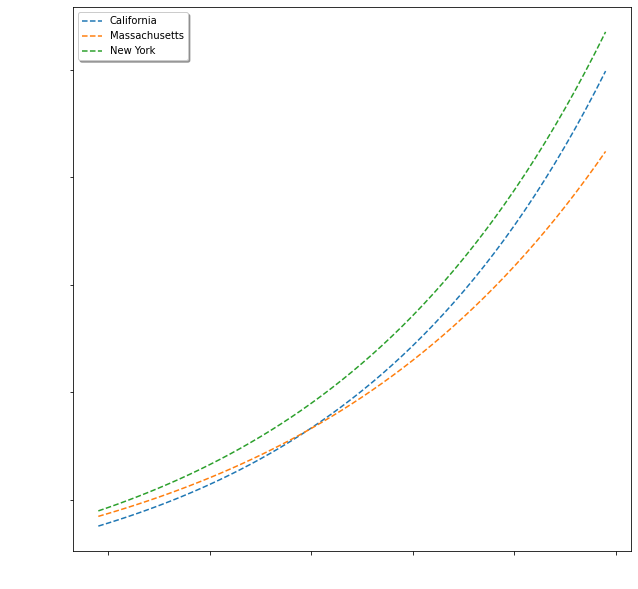

In [1007]:
def gdp_value_calc_test(dataset,value,state,grw):
    a = value
    list_values = []
    for i in range(len(dataset)):
        list_values.append(a)
        a += grw * a
    dataset[state] = list_values

    



ca_2019_gdp = float(gdp_per_capita.CA_gdp_per_capita.iloc[1])
ma_2019_gdp = float(gdp_per_capita.MA_gdp_per_capita.iloc[1])
ny_2019_gdp = float(gdp_per_capita.NY_gdp_per_capita.iloc[1])
data = {'DATE':[i for i in range(2019,2070)]}
df1 = pd.DataFrame(data)



gdp_value_calc_test(df1,ca_2019_gdp,'California',0.0385)
gdp_value_calc_test(df1,ma_2019_gdp,'Massachusetts',0.03279)
gdp_value_calc_test(df1,ny_2019_gdp,'New York',0.0364)


range_gdp_1 = [i for i in range(100000,500001) if i % 100000 == 0]
range_years_1 = [2020,2030,2040,2050,2060,2070]
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
ax.plot(df1.DATE,df1.California,label='California',linestyle='--')
ax.plot(df1.DATE,df1.Massachusetts,label='Massachusetts',linestyle='--')
ax.plot(df1.DATE,df1['New York'], label='New York',linestyle='--')
ax.set_xticks(range_years_1)
ax.set_yticks(range_gdp_1)
ax.set_xticklabels(range_years_1,color='white')
ax.set_yticklabels([str(i) + '$' for i in range_gdp_1],color='white')
plt.xlabel('Years',color='white')
plt.ylabel('Gdp per capita in USD',color='white')
plt.legend(fancybox=True,shadow=True)
plt.show()






As visible above hypotetically, if the approximate gdp growth per capita stayed on the same levels for states Massachusets, California and New York, around 2040 California would surpass the Commonwealth of Massachusetts in terms of gdp per capita. Please note that the graph and the calculations was made just for curiosity reasons it is very unlikely that the gdp per capita growth will be equal for the next 50 years. There are events like market crashes, wars, pandemics and much more which might totally reverse the growing trend in the near future. We should always consider other factors than only historic results while trying to predict future behaviour of economic indicators.

### Analysis results
<br>

#### Period: 2010-2019

<br>

#### States: <br>
California, Connecticut, Delaware, Maine, Maryland Massachusetts, New Hampshire, New Jersey, New York, Pennsylvania, Rhode Island, Vermont
<br>

#### The highest population growth:
<br>
1. Delaware: +8.2%
<br>
2. California: +5.8%
<br>
3. Massachusetts: +4.9%
<br>

#### The lowest population growth(or highest population decrease):
<br>
1.Connecticut: -0.38%
<br>
2.Vermont: -0.30%
<br>
3.New York: +0.2%
<br>

Average population growth: +2.5%
<br>
Average population growth without Delaware: +1.9%
<br>
Average population growth in all US: +6.1%
<br>

#### The highest growth of gross domestic product per capita:
<br>
1. California: +46% 
<br>
2. New York +43% 
<br>
3. Massachusets +38% 
<br>

#### The lowest growth of gross domestic product per capita:
<br>
1. Delaware: +19% 
<br>
2. Connecticut: +23%
<br>
3. Rhode island: +24% 
<br>

Average gdp per capita growth: +30%

#### Gross domestic product per capita state wise (2019):
<br>
1. New York: 89,601 USD
<br>
2. Massachusetts: 84,521 USD
<br>
3. Connecticut: 79,978 USD
<br>
4. Delaware: 77,430 USD
<br>
5. California: 75,465 USD
<br>
6. New Jersey: 70,710 USD
<br>
7. Maryland: 68,768 USD
<br>
8. New Hampshire: 63,720 USD
<br>
9. Pennsylvania: 61,448 USD
<br>
10. Rhode Island: 57,179 USD
<br>
11. Vermont: 54,261 USD
<br>
12. Maine: 49,993 USD
<br>








The analysis showed us that north-eastern state are losing the status of the wealthies and the economicaly strongest region of the United States in favor of California. California's growth considering all it's issues looks unstopable for now but we should keep in mind the fact that current trend might change rapidly.